In [20]:
from GA.GA import GA_Design_Optim
import matplotlib.pyplot as plt
import numpy as np

GA = GA_Design_Optim(decode_size = 12)


load from:
best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [21]:
pop = GA.pop
thigh_lenth,b,c,d,e = GA.translateDNA(pop)

thigh_lenth.sort()

thigh_lenth.sort()
idx = np.random.choice(np.arange(80), size=80, replace=True,)
#plt.plot(idx)
#plt.show()
print(idx)
GA.init_controller()

[14 15 74 39 64  1 45 64 50 62 40 27 45 43 67 39 31 30 33 74 60 40 47 70
 45 12 45 12 65 73 26 43 61 62 15 29 32 29 66 23 23 31  9 14 53 37 23 11
  4 40 60 25  7  6 55 71 10 34 70 13 40 47 69 19 50 46 39 12 30 13 72 38
 78 69 50  8 53 42 33  3]
load from:
best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [22]:
thigh_lenth[1]

0.7073260073260073

## 不使用vector env时，种群数量为80、评估取8次平均的一次全种群评估消耗时间7分42秒。

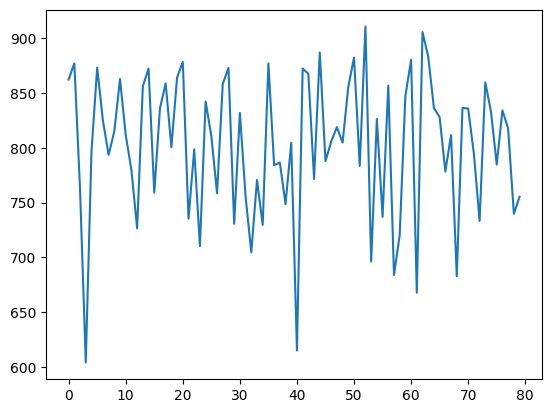

In [5]:
plt.plot(fitness)
plt.show()

In [1]:
# ------- 来自于mujoco150在win+py3.9下的矫情的要求 --------
# 手动添加mujoco路径
import os
from getpass import getuser
user_id = getuser()
os.add_dll_directory(f"C://Users//{user_id}//.mujoco//mujoco200//bin")
os.add_dll_directory(f"C://Users//{user_id}//.mujoco//mujoco-py-2.0.2.0//mujoco_py")
# -------------------------------------------------------
import time
import argparse
import sys
import gym_custom_env       # 注册自定义环境
import gym
import numpy as np
import pybullet_envs

from stable_baselines3 import SAC, TD3, PPO

e:\ANACONDA\envs\GYM\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
def update_xml_model(self,params):
    # VecEnv更新XML模型
    for env_idx in range(self.num_envs):
        self.envs[env_idx].update_xml_model(params)
    

DummyVecEnv.update_xml_model = update_xml_model
print('load from:')
save_path = 'best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip'
print(save_path)
env_kwargs = {'terrain_type':'steps'}
env_model = make_vec_env(env_id = 'HumanoidCustomEnv-v0', n_envs = 5, env_kwargs = env_kwargs)
algo = 'sac'
hyperparams = {
    "sac": dict(
        batch_size=256,
        gamma=0.98,
        policy_kwargs=dict(net_arch=[256, 256]),
        learning_starts=10000,
        buffer_size=int(5e2),
        tau=0.01,
        gradient_steps=4,
    ),
    "ppo": dict(
        batch_size=512,
        learning_rate=2.5e-4,
        policy_kwargs=dict(net_arch=({'pi':[128,128]},{'vf':[128,128]})),
        gamma=0.99
    )
}[algo]
model = SAC("MlpPolicy", env_model, verbose=1,  **hyperparams)
model.set_parameters(save_path)

load from:
best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Using cuda device


## VecEnv 评估

In [3]:

n_envs = 8
env_model = make_vec_env(env_id = 'HumanoidCustomEnv-v0', n_envs = n_envs, env_kwargs = env_kwargs)
obs = env_model.reset()
episode = 0
episode_rewards = []
episode_reward = np.zeros(n_envs)
while episode < n_envs:
    action, _  = model.predict(obs,)
    obs, rewards, dones, infos = env_model.step(action)
    episode_reward += rewards
    for idx,done in enumerate(dones):
        if done:
            print(idx)
            episode += 1
            episode_rewards.append(episode_reward[idx])
            episode_reward[idx] = 0
print(np.mean(episode_rewards))



============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
2
4
5
6
1
0
7
3
793.5681199803948


In [4]:
params =                     {  'thigh_lenth':0.54,           # 大腿长 0.34
                                'shin_lenth':0.5,              # 小腿长 0.3
                                'upper_arm_lenth':0.22,        # 大臂长 0.2771
                                'lower_arm_lenth':0.31,        # 小臂长 0.2944
                                'foot_lenth':0.14,       }     # 脚长   0.18
env_model.update_xml_model(params)

bingqilin
bingqilin
bingqilin
bingqilin
bingqilin
bingqilin
bingqilin
bingqilin


In [4]:
env = gym.make('HumanoidCustomEnv-v0', terrain_type='steps')
episode_rewards, episode_lengths = [], []
for i in range(2):
    obs = env.reset()
    done = False
    episode_reward = 0.0
    episode_length = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        episode_length += 1
        #env.render(mode="human")
        #dt = 1.0 / 240.0
        #time.sleep(dt)

    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)
    print(
        f"Episode {len(episode_rewards)} reward={episode_reward}, length={episode_length}"
    )

    print('************************')
    # env.update_xml_model(params)
    # params['shin_lenth'] = 0.5 + 0.1*i

mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)

============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Episode 1 reward=808.3425090988079, length=269
************************
Episode 2 reward=827.8369482974523, length=255
************************


In [40]:
from GA.GA import GA_Design_Optim
import matplotlib.pyplot as plt
import numpy as np

GA = GA_Design_Optim(decode_size = 12)
GA.pop[1]
GA.pop[1][:5] = 1
GA.pop[1][5:] = 0
GA.pop[1]
t,s,u,l,f = GA.translateDNA(GA.pop[:2])

load from:
best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [54]:

import numpy as np

# 创建一个 numpy 数组  
arr = np.array([1, 5, 2, 8, 3, 9, 10])

# 使用 sort 函数获取数组的前五个最大的数的索引  
sorted_indices = np.argmax(arr)
print(arr.argsort())
b = arr.argsort()[-5:]
b = b[::-1]
print(np.max(arr))

[0 2 4 1 3 5 6]
10


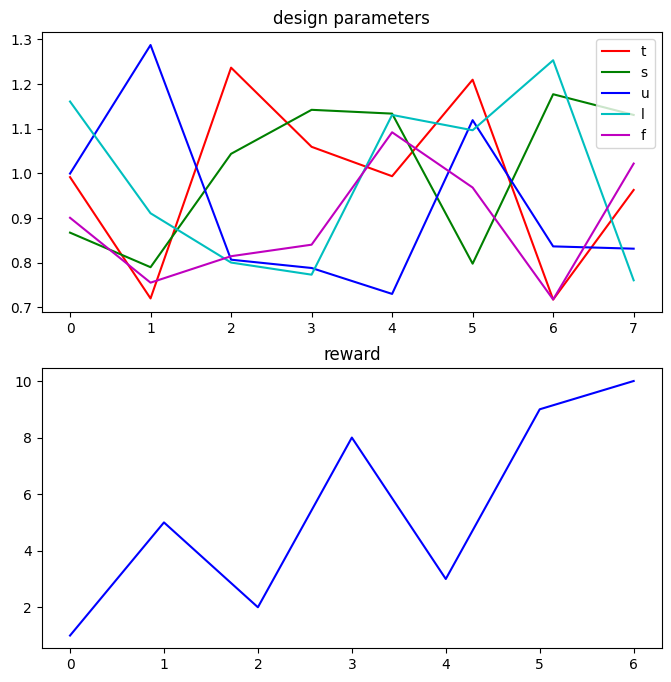

In [59]:
best_individual = list()
best_individual.append(pop[2])
best_individual.append(pop[21])
best_individual.append(pop[24])
best_individual.append(pop[55])
best_individual.append(pop[3])
best_individual.append(pop[7])
best_individual.append(pop[12])
best_individual.append(pop[40])
t,s,u,l,f = GA.translateDNA(np.array(best_individual))
plt.figure(1,figsize=(8, 8))
plt.subplot(2,1,1)
plt.plot(t,color='r')
plt.plot(s,color='g')
plt.plot(u,color='b')
plt.plot(l,color='c')
plt.plot(f,color='m')
plt.legend(['t','s','u','l','f'])
plt.title('design parameters')
plt.subplot(2,1,2)
arr = np.array([1, 5, 2, 8, 3, 9, 10])
plt.plot(arr,color='b')
plt.title('reward')
plt.savefig('screenshot/savefig_example.png', bbox_inches='tight')
plt.show()